In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('credit_card_fraud.csv')
raw_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#Drop Unnamed column 
raw_data = raw_data.drop(['Unnamed: 0'], axis = 1)
raw_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [5]:
## Check for missing data
raw_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
raw_data.shape

(1296675, 22)

<AxesSubplot:>

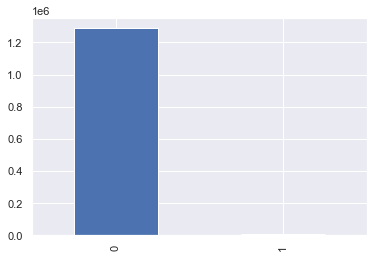

In [7]:
## Visual summary of target variable 
fraud = pd.value_counts(raw_data['is_fraud'], sort = False)
fraud.plot(kind = 'bar')

In [8]:
## Get numerical summary of target variable
target_summ = raw_data[['is_fraud', 'trans_date_trans_time']].groupby('is_fraud').count().reset_index()
target_summ.columns = ['is_fraud', 'count']
target_summ['Percentage'] = ((target_summ['count']/target_summ['count'].sum())*100).round(2)
target_summ

,is_fraud,count,Percentage
0,0,1289169,99.42
1,1,7506,0.58


In [9]:
# Convert transaction date/time format to date and time 
raw_data['trans_date_trans_time'] = pd.to_datetime(raw_data['trans_date_trans_time'])

In [10]:
raw_data.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [11]:
# Get transaction hour from transaction time 
raw_data['trans_hour'] = raw_data['trans_date_trans_time'].dt.hour

In [12]:
raw_data['day_of_week'] = raw_data['trans_date_trans_time'].dt.day_name()

In [13]:
raw_data['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_of_week, Length: 1296675, dtype: object

In [14]:
raw_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday


In [15]:
raw_data['year_month'] = raw_data['trans_date_trans_time'].dt.to_period('M')

In [16]:
data = raw_data.copy()

<AxesSubplot:>

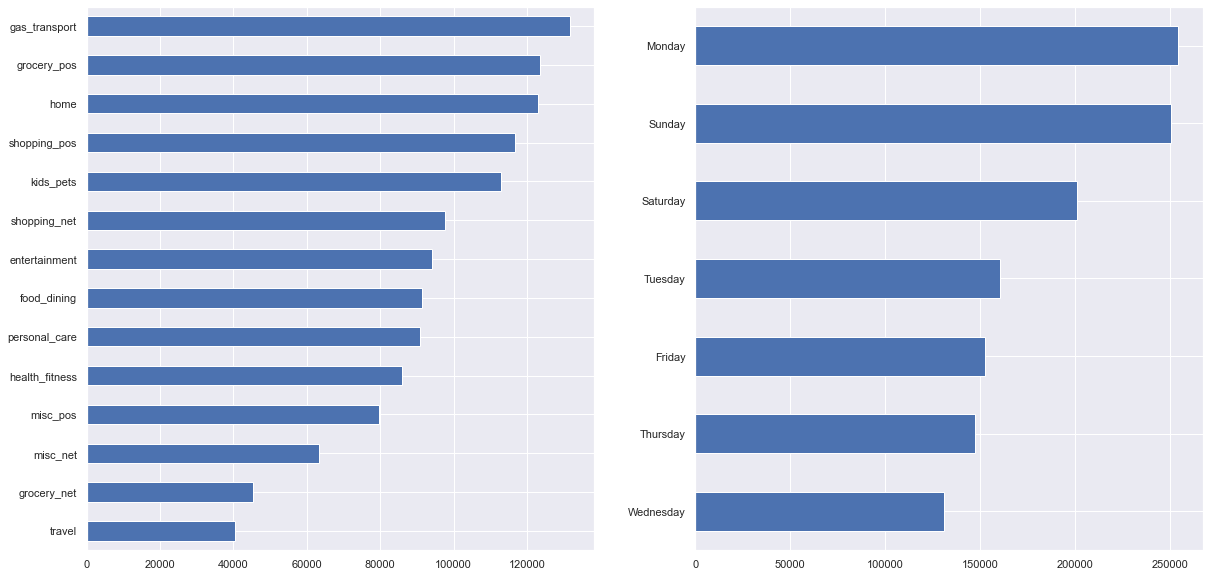

In [17]:
## Visualising data to show patterns - Categories and Day of Week
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
data['category'].value_counts(ascending = True).plot.barh()
plt.subplot(1,2,2)
data['day_of_week'].value_counts(ascending = True).plot.barh()

<AxesSubplot:>

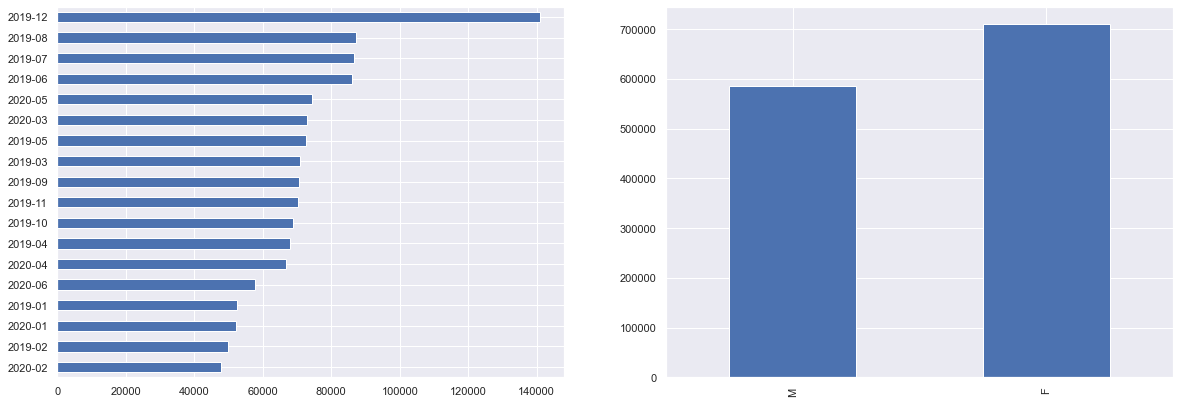

In [18]:
## Visualising data to show patterns - Month and Gender
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
data['year_month'].value_counts(ascending = True).plot.barh()
plt.subplot(2,2,2)
data['gender'].value_counts(ascending = True).plot.bar()

In [19]:
## Visualising data to show patterns - States
data['state'].value_counts(normalize = True)

TX    0.073169
NY    0.064396
PA    0.061578
CA    0.043465
OH    0.035846
MI    0.035594
IL    0.033356
FL    0.032908
AL    0.031611
MO    0.029617
MN    0.024458
AR    0.024005
NC    0.023341
WI    0.022649
VA    0.022558
SC    0.022511
KY    0.021960
IN    0.021270
IA    0.020811
OK    0.020569
MD    0.020200
GA    0.020100
WV    0.019813
NJ    0.018974
NE    0.018638
KS    0.017735
MS    0.016340
LA    0.016168
WY    0.014901
WA    0.014594
OR    0.014342
TN    0.013538
ME    0.012729
NM    0.012653
ND    0.011403
CO    0.010704
MA    0.009544
SD    0.009504
VT    0.009076
MT    0.009065
AZ    0.008306
UT    0.008251
NH    0.006384
CT    0.005940
NV    0.004324
ID    0.004276
DC    0.002786
HI    0.001974
AK    0.001635
RI    0.000424
DE    0.000007
Name: state, dtype: float64

In [20]:
## Analysing fraudulent transactions

In [21]:
data_fraud = data[data['is_fraud'] ==1 ]
data_no_fraud = data[data['is_fraud'] == 0 ]

In [22]:
# Fraudulent transactions by day
day_fraud = data_fraud.groupby(data_fraud['day_of_week'])[['trans_num']].nunique().reset_index()
day_fraud.columns = ['day_of_week', 'fraudulent']
day_fraud.sort_values(by = ['fraudulent'], ascending = False, inplace = True)
day_fraud

,day_of_week,fraudulent
2,Saturday,1227
3,Sunday,1216
1,Monday,1182
0,Friday,1079
4,Thursday,1008
5,Tuesday,935
6,Wednesday,859


In [23]:
# Fraudulent transactions by category
cat_fraud = data_fraud.groupby(data_fraud['category'])[['trans_num']].nunique().reset_index()
cat_fraud.columns = ['category', 'fraudulent']
cat_fraud.sort_values(by = ['fraudulent'], ascending = False, inplace = True)
cat_fraud

,category,fraudulent
4,grocery_pos,1743
11,shopping_net,1713
8,misc_net,915
12,shopping_pos,843
2,gas_transport,618
9,misc_pos,250
7,kids_pets,239
0,entertainment,233
10,personal_care,220
6,home,198


In [24]:
# Fraudulent transactions by month
month_fraud = data_fraud.groupby(data_fraud['year_month'])[['trans_num']].nunique().reset_index()
month_fraud.columns = ['year_month', 'fraudulent']
month_fraud.sort_values(by = ['fraudulent'], ascending = False, inplace = True)
month_fraud

,year_month,fraudulent
11,2019-12,592
16,2020-05,527
1,2019-02,517
0,2019-01,506
2,2019-03,494
9,2019-10,454
14,2020-03,444
8,2019-09,418
4,2019-05,408
10,2019-11,388


<AxesSubplot:>

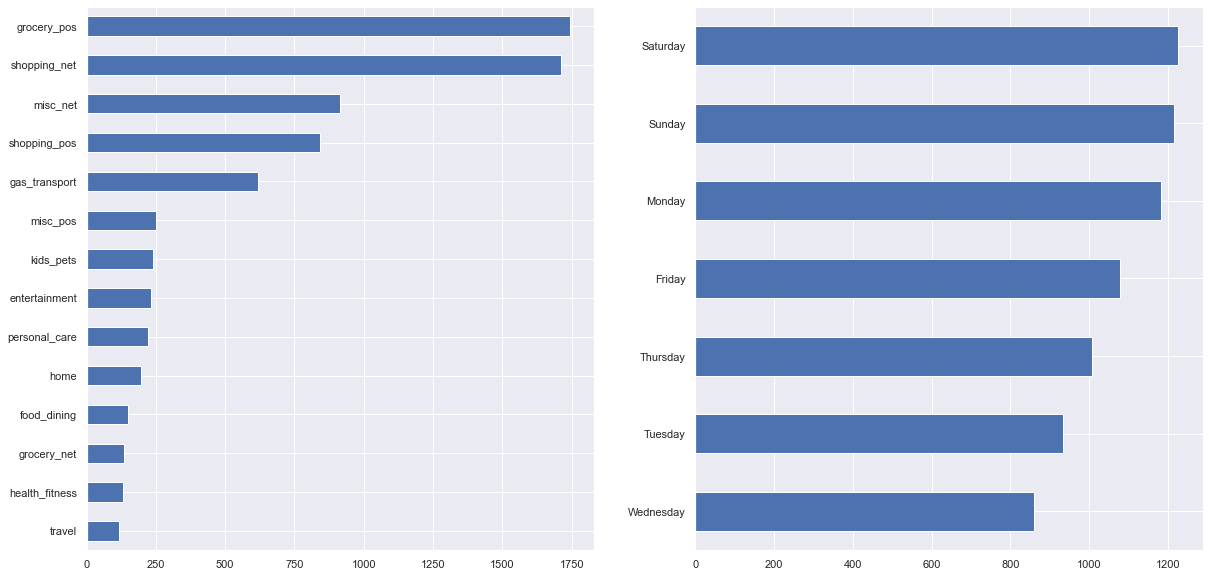

In [25]:
## Plots of Category and day of week
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
data_fraud['category'].value_counts(ascending = True).plot.barh()
plt.subplot(1,2,2)
data_fraud['day_of_week'].value_counts(ascending = True).plot.barh()

<AxesSubplot:>

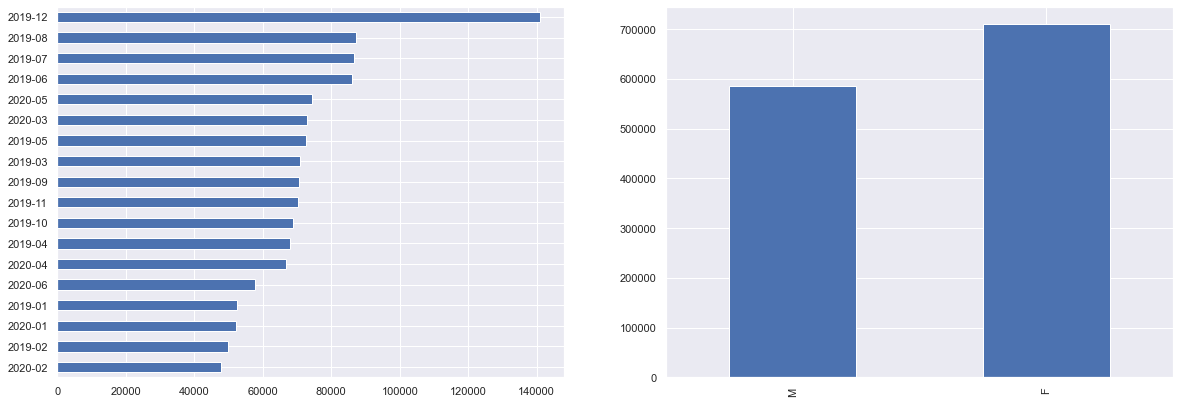

In [26]:
## Plots of Month and Gender
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
data['year_month'].value_counts(ascending = True).plot.barh()
plt.subplot(2,2,2)
data['gender'].value_counts(ascending = True).plot.bar()

In [27]:
## Proportion of fraudulent activities by day
day_no_fraud = data_no_fraud.groupby(data_no_fraud['day_of_week'])[['trans_num']].nunique().reset_index()
day_no_fraud.columns = ['day_of_week', 'non_fraudulent']

In [28]:
day_fraud_prop = pd.merge(day_fraud, day_no_fraud, on = 'day_of_week')
day_fraud_prop['% fraud'] = ((day_fraud_prop['fraudulent']/(day_fraud_prop['fraudulent'] + day_fraud_prop['non_fraudulent']))*100).round(2)
day_fraud_prop.sort_values(by = ['% fraud'], ascending  = False, inplace = True)
day_fraud_prop

,day_of_week,fraudulent,non_fraudulent,% fraud
3,Friday,1079,151193,0.71
4,Thursday,1008,146277,0.68
6,Wednesday,859,130214,0.66
0,Saturday,1227,199730,0.61
5,Tuesday,935,159292,0.58
1,Sunday,1216,249363,0.49
2,Monday,1182,253100,0.46


In [29]:
## Proportion of fraudulent activities by category
cat_no_fraud = data_no_fraud.groupby(data_no_fraud['category'])[['trans_num']].nunique().reset_index()
cat_no_fraud.columns = ['category', 'non_fraudulent']

In [30]:
cat_fraud_prop = pd.merge(cat_fraud, cat_no_fraud, on = 'category')

In [31]:
cat_fraud_prop['% fraud'] = ((cat_fraud_prop['fraudulent']/(cat_fraud_prop['fraudulent'] + cat_fraud_prop['non_fraudulent']))*100).round(2)
cat_fraud_prop.sort_values(by = ['% fraud'], ascending  = False, inplace = True)
cat_fraud_prop

,category,fraudulent,non_fraudulent,% fraud
1,shopping_net,1713,95830,1.76
2,misc_net,915,62372,1.45
0,grocery_pos,1743,121895,1.41
3,shopping_pos,843,115829,0.72
4,gas_transport,618,131041,0.47
5,misc_pos,250,79405,0.31
11,grocery_net,134,45318,0.29
13,travel,116,40391,0.29
7,entertainment,233,93781,0.25
8,personal_care,220,90538,0.24


In [32]:
## Proportion of fraudulent activities by month
month_no_fraud = data_no_fraud.groupby(data_no_fraud['year_month'])[['trans_num']].nunique().reset_index()
month_no_fraud.columns = ['year_month', 'non_fraudulent']

In [33]:
fraud_merge = pd.merge(month_fraud, month_no_fraud, on = 'year_month')
fraud_merge.sort_values(by = ['year_month'], ascending = True, inplace = True)
fraud_merge.reset_index(inplace = True)
fraud_merge.drop(['index'], axis = 1, inplace = True)

In [34]:
fraud_merge

,year_month,fraudulent,non_fraudulent
0,2019-01,506,52019
1,2019-02,517,49349
2,2019-03,494,70445
3,2019-04,376,67702
4,2019-05,408,72124
5,2019-06,354,85710
6,2019-07,331,86265
7,2019-08,382,86977
8,2019-09,418,70234
9,2019-10,454,68304


In [35]:
#fraudulent transactions
jan_f = fraud_merge.iloc[0,1]+fraud_merge.iloc[12,1]
feb_f = fraud_merge.iloc[1,1]+fraud_merge.iloc[13,1]
mar_f = fraud_merge.iloc[2,1]+fraud_merge.iloc[14,1]
apr_f = fraud_merge.iloc[3,1]+fraud_merge.iloc[15,1]
may_f = fraud_merge.iloc[4,1]+fraud_merge.iloc[16,1]
jun_f = fraud_merge.iloc[5,1]+fraud_merge.iloc[17,1]
jul_f = fraud_merge.iloc[6,1]
aug_f = fraud_merge.iloc[7,1]
sep_f = fraud_merge.iloc[8,1]
oct_f = fraud_merge.iloc[9,1]
nov_f = fraud_merge.iloc[10,1]
dec_f = fraud_merge.iloc[11,1]

In [36]:
#non fraudulent transactions
jan_nf = fraud_merge.iloc[0,2]+fraud_merge.iloc[12,2]
feb_nf = fraud_merge.iloc[1,2]+fraud_merge.iloc[13,2]
mar_nf = fraud_merge.iloc[2,2]+fraud_merge.iloc[14,2]
apr_nf = fraud_merge.iloc[3,2]+fraud_merge.iloc[15,2]
may_nf = fraud_merge.iloc[4,2]+fraud_merge.iloc[16,2]
jun_nf = fraud_merge.iloc[5,2]+fraud_merge.iloc[17,2]
jul_nf = fraud_merge.iloc[6,2]
aug_nf = fraud_merge.iloc[7,2]
sep_nf = fraud_merge.iloc[8,2]
oct_nf = fraud_merge.iloc[9,2]
nov_nf = fraud_merge.iloc[10,2]
dec_nf = fraud_merge.iloc[11,2]

In [37]:
month_fraud_prop = pd.DataFrame()
month_fraud_prop['Month'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
                'December']
month_fraud_prop['fraudulent'] = [jan_f, feb_f, mar_f, apr_f, may_f, jun_f, jul_f, aug_f, sep_f, oct_f, nov_f, dec_f]
month_fraud_prop['non_fraudulent'] = [jan_nf, feb_nf, mar_nf, apr_nf, may_nf, jun_nf, jul_nf, aug_nf, sep_nf, oct_nf, nov_nf, dec_nf]
month_fraud_prop['% fraud'] = ((month_fraud_prop['fraudulent']/(month_fraud_prop['fraudulent'] + month_fraud_prop['non_fraudulent']))*100).round(2)
month_fraud_prop.sort_values(by = ['% fraud'], ascending  = False, inplace = True)

In [38]:
month_fraud_prop

,Month,fraudulent,non_fraudulent,% fraud
1,February,853,96804,0.87
0,January,849,103878,0.81
9,October,454,68304,0.66
2,March,938,142851,0.65
4,May,935,145940,0.64
8,September,418,70234,0.59
10,November,388,70033,0.55
3,April,678,134292,0.50
5,June,688,143123,0.48
7,August,382,86977,0.44


In [39]:
data['dob'] = pd.to_datetime(data['dob'])

In [40]:
data['age'] = np.round((data['trans_date_trans_time'] - data['dob'])/np.timedelta64(1, 'Y'))

In [41]:
data['age'].describe()

count    1.296675e+06
mean     4.599986e+01
std      1.739626e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

In [42]:
data = data.drop(['trans_date_trans_time', 'cc_num', 'merchant',
       'first', 'last', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'year_month'], axis = 1)

In [43]:
# Change categorical variables to dummy variables
dummies = pd.get_dummies(data[['category', 'gender', 'day_of_week']], drop_first = True)
dummies.head()

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [44]:
full_data = pd.concat([data, dummies], axis = 1)
full_data.head()

,category,amt,gender,city_pop,is_fraud,trans_hour,day_of_week,age,category_food_dining,category_gas_transport,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,misc_net,4.97,F,3495,0,0,Tuesday,31.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,grocery_pos,107.23,F,149,0,0,Tuesday,41.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,entertainment,220.11,M,4154,0,0,Tuesday,57.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,gas_transport,45.00,M,1939,0,0,Tuesday,52.0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,misc_pos,41.96,M,99,0,0,Tuesday,33.0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
full_data = full_data.drop(['category', 'gender', 'day_of_week'], axis = 1)

In [46]:
full_data.head()

,amt,city_pop,is_fraud,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,4.97,3495,0,0,31.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,107.23,149,0,0,41.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,220.11,4154,0,0,57.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,45.00,1939,0,0,52.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,41.96,99,0,0,33.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
full_data.dtypes

amt                        float64
city_pop                     int64
is_fraud                     int64
trans_hour                   int64
age                        float64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
gender_M                     uint8
day_of_week_Monday           uint8
day_of_week_Saturday         uint8
day_of_week_Sunday           uint8
day_of_week_Thursday         uint8
day_of_week_Tuesday          uint8
day_of_week_Wednesday        uint8
dtype: object

In [48]:
from sklearn.metrics import accuracy_score, f1_score ,confusion_matrix, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
## Split data into independent and dependet variables and scale independent variables

In [50]:
inputs = full_data.drop(['is_fraud'], axis = 1)
target = full_data['is_fraud']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [52]:
scale = StandardScaler()

In [53]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [54]:
#scale = StandardScaler()
#scale.fit(inputs)
#inputs_scaled = scale.transform(inputs)

In [55]:
# Split data into train and test set
#x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state = 42)

In [56]:
## Logistic Regression 

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [59]:
y_lr_pred = lr.predict(x_train)

In [60]:
lr_f1 = f1_score(y_train, y_lr_pred).round(2)
lr_f1

0.02

In [61]:
pd.DataFrame(confusion_matrix(y_train, y_lr_pred))

,0,1
0,1030898,456
1,5926,60


In [62]:
lr_recall = recall_score(y_train, y_lr_pred).round(2)
lr_recall

0.01

In [63]:
lr_acc = accuracy_score(y_train, y_lr_pred)
lr_acc

0.9938477259143579

In [64]:
## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
y_rf_pred = rf.predict(x_train)

In [69]:
rf_f1 = f1_score(y_train, y_rf_pred).round(2)
rf_f1

1.0

In [70]:
pd.DataFrame(confusion_matrix(y_train, y_rf_pred))

,0,1
0,1031354,0
1,1,5985


In [71]:
rf_recall = recall_score(y_train, y_rf_pred).round(2)
rf_recall

1.0

In [72]:
rf_acc = accuracy_score(y_train, y_rf_pred)
rf_acc

0.9999990359959127

In [73]:
## XGBoost

In [74]:
from xgboost import XGBClassifier

In [75]:
xgb = XGBClassifier()

In [76]:
xgb.fit(x_train, y_train)

[13:43:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_xgb_pred = xgb.predict(x_train)

In [78]:
xgb_f1 = f1_score(y_train, y_xgb_pred).round(2)
xgb_f1

0.92

In [79]:
xgb_recall = recall_score(y_train, y_xgb_pred).round(2)
xgb_recall

0.86

In [80]:
pd.DataFrame(confusion_matrix(y_train, y_xgb_pred))

,0,1
0,1031251,103
1,814,5172


In [81]:
xgb_acc = accuracy_score(y_train, y_xgb_pred)
xgb_acc

0.999116008251875

In [82]:
## Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [84]:
y_nb_pred = classifier.predict(x_train)

In [85]:
nb_f1 = f1_score(y_train, y_nb_pred).round(2)
nb_f1

0.08

In [86]:
nb_recall = recall_score(y_train, y_nb_pred).round(2)
nb_recall

0.69

In [87]:
pd.DataFrame(confusion_matrix(y_train, y_nb_pred))

,0,1
0,935266,96088
1,1871,4115


In [88]:
nb_acc = accuracy_score(y_train, y_nb_pred)
nb_acc

0.9055671236046041

In [89]:
Summary = pd.DataFrame()
Summary['Models'] = ['Logistic Regression', 'Random Forest', 'Support Vector', 'Naive Bayes']
Summary['f1'] = ([lr_f1, rf_f1, nb_f1, xgb_f1])
Summary['Recall'] = ([lr_recall, rf_recall, nb_recall, xgb_recall])
Summary['Accuracy'] = ([lr_acc, rf_acc, nb_acc, xgb_acc])

In [90]:
Summary.sort_values(by = ['Recall'], ascending = False, inplace = True)
Summary

,Models,f1,Recall,Accuracy
1,Random Forest,1.00,1.00,0.999999
3,Naive Bayes,0.92,0.86,0.999116
2,Support Vector,0.08,0.69,0.905567
0,Logistic Regression,0.02,0.01,0.993848


In [91]:
## Use test data using random forest 

In [92]:
y_pred = rf.predict(x_test)

In [93]:
f1_score(y_test, y_pred).round(2)

0.87

In [94]:
recall_score(y_test, y_pred).round(2)

0.79

In [95]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,257781,34
1,320,1200


In [96]:
pred_acc = accuracy_score(y_test, y_pred).round(3)
pred_acc

0.999